In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path("..").resolve()))

import pandas as pd


In [2]:
from src.extract import extract_zip_chunked
from src.config import ZIP_TARGET

file_path = r"/Users/youch/Downloads/Parcel_Data_2021_Table_8468414499611436475.csv"
out_path = "../data/processed/filtered_91766.csv"

extract_zip_chunked(file_path=file_path, out_path=out_path, zip_code=ZIP_TARGET)
print("Saved:", out_path)

Saved: ../data/processed/filtered_91766.csv


In [3]:
from src.prep import clean_and_engineer, add_high_value_flag

df_raw = pd.read_csv("../data/processed/filtered_91766.csv")
df = clean_and_engineer(df_raw)
df = add_high_value_flag(df, quantile=0.95)

df.head(), df.shape

(   Property Use Type  Year Built  Square Footage  Number of Bedrooms  \
 6                SFR      1885.0          2404.0                 3.0   
 7                SFR      2008.0          2361.0                 4.0   
 8                SFR      2008.0          2361.0                 4.0   
 9                SFR      2008.0          2361.0                 4.0   
 10               SFR      2008.0          2361.0                 4.0   
 
     Number of Bathrooms  Number of Units  Land Value  Improvement Value  \
 6                   2.0              1.0    118963.0           160602.0   
 7                   3.0              1.0    258260.0           262176.0   
 8                   3.0              1.0    119246.0           296931.0   
 9                   3.0              1.0    279297.0           356664.0   
 10                  3.0              1.0    118963.0           296228.0   
 
     Total Value Land Improvement  Total Value  Taxable Value  price/sqft  \
 6                       

In [4]:
df.columns, df.dtypes, df.describe()

(Index(['Property Use Type', 'Year Built', 'Square Footage',
        'Number of Bedrooms', 'Number of Bathrooms', 'Number of Units',
        'Land Value', 'Improvement Value', 'Total Value Land Improvement',
        'Total Value', 'Taxable Value', 'price/sqft', 'house_age',
        'improvement_to_land_ratio', 'is_high_value'],
       dtype='object'),
 Property Use Type                object
 Year Built                      float64
 Square Footage                  float64
 Number of Bedrooms              float64
 Number of Bathrooms             float64
 Number of Units                 float64
 Land Value                      float64
 Improvement Value               float64
 Total Value Land Improvement    float64
 Total Value                     float64
 Taxable Value                   float64
 price/sqft                      float64
 house_age                       float64
 improvement_to_land_ratio       float64
 is_high_value                      bool
 dtype: object,
         Year B

In [5]:
df["Property Use Type"].value_counts()

Property Use Type
SFR    380
Name: count, dtype: int64

In [6]:
df["is_high_value"].value_counts()
df.groupby("is_high_value")[["Square Footage", "price/sqft"]].mean()

,Square Footage,price/sqft
is_high_value,,
False,2176.819945,311.422691
True,2751.736842,397.113137


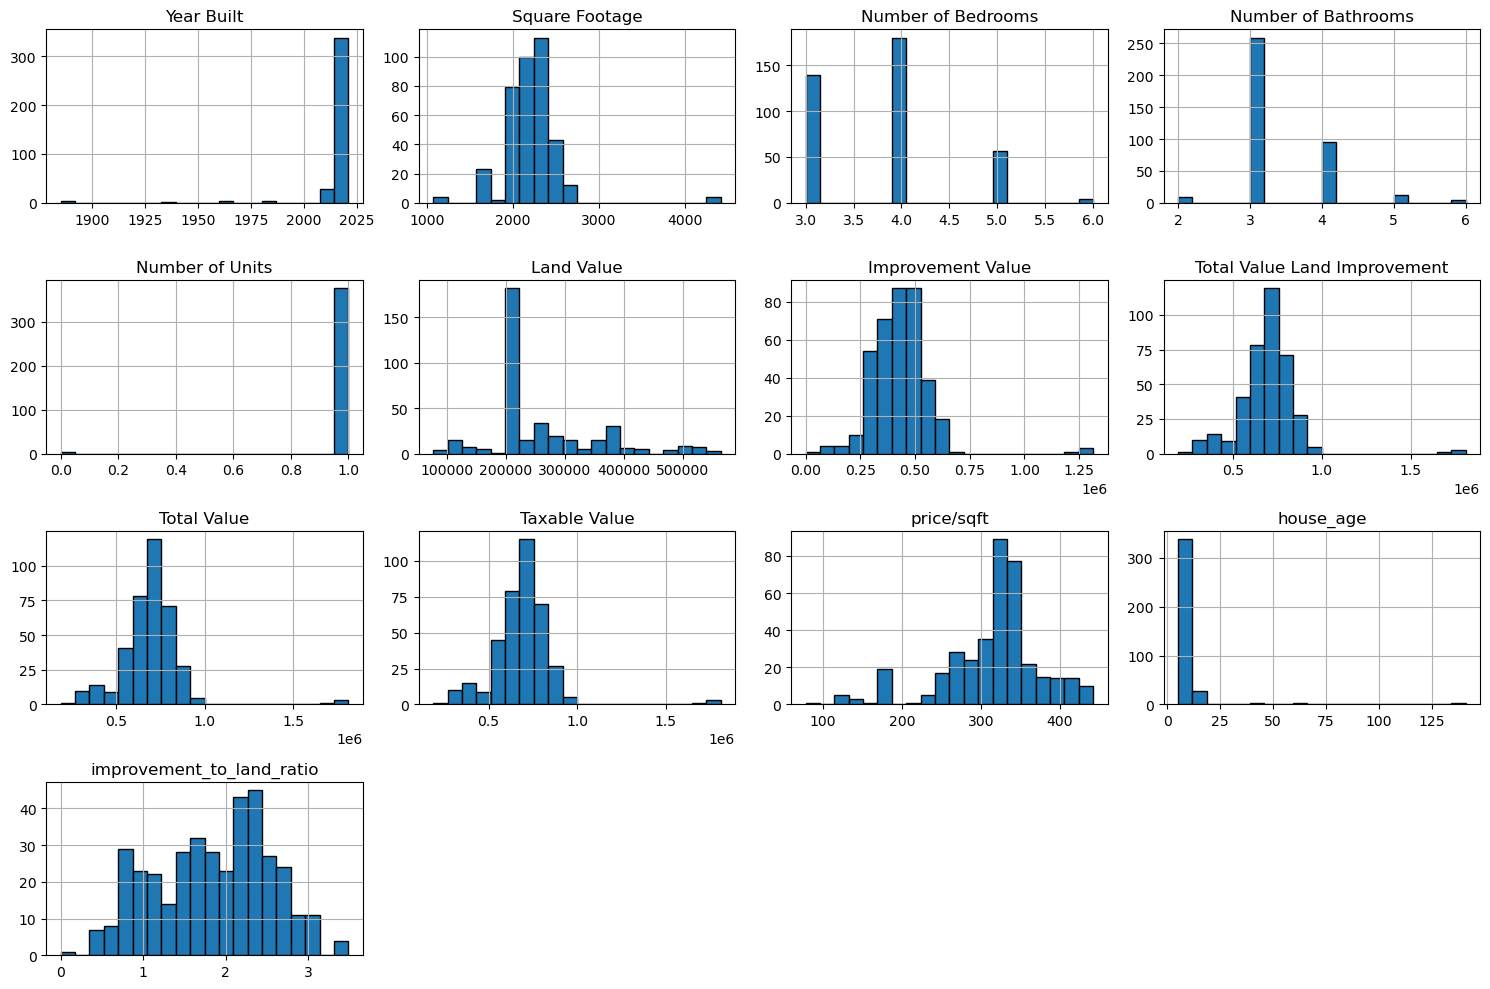

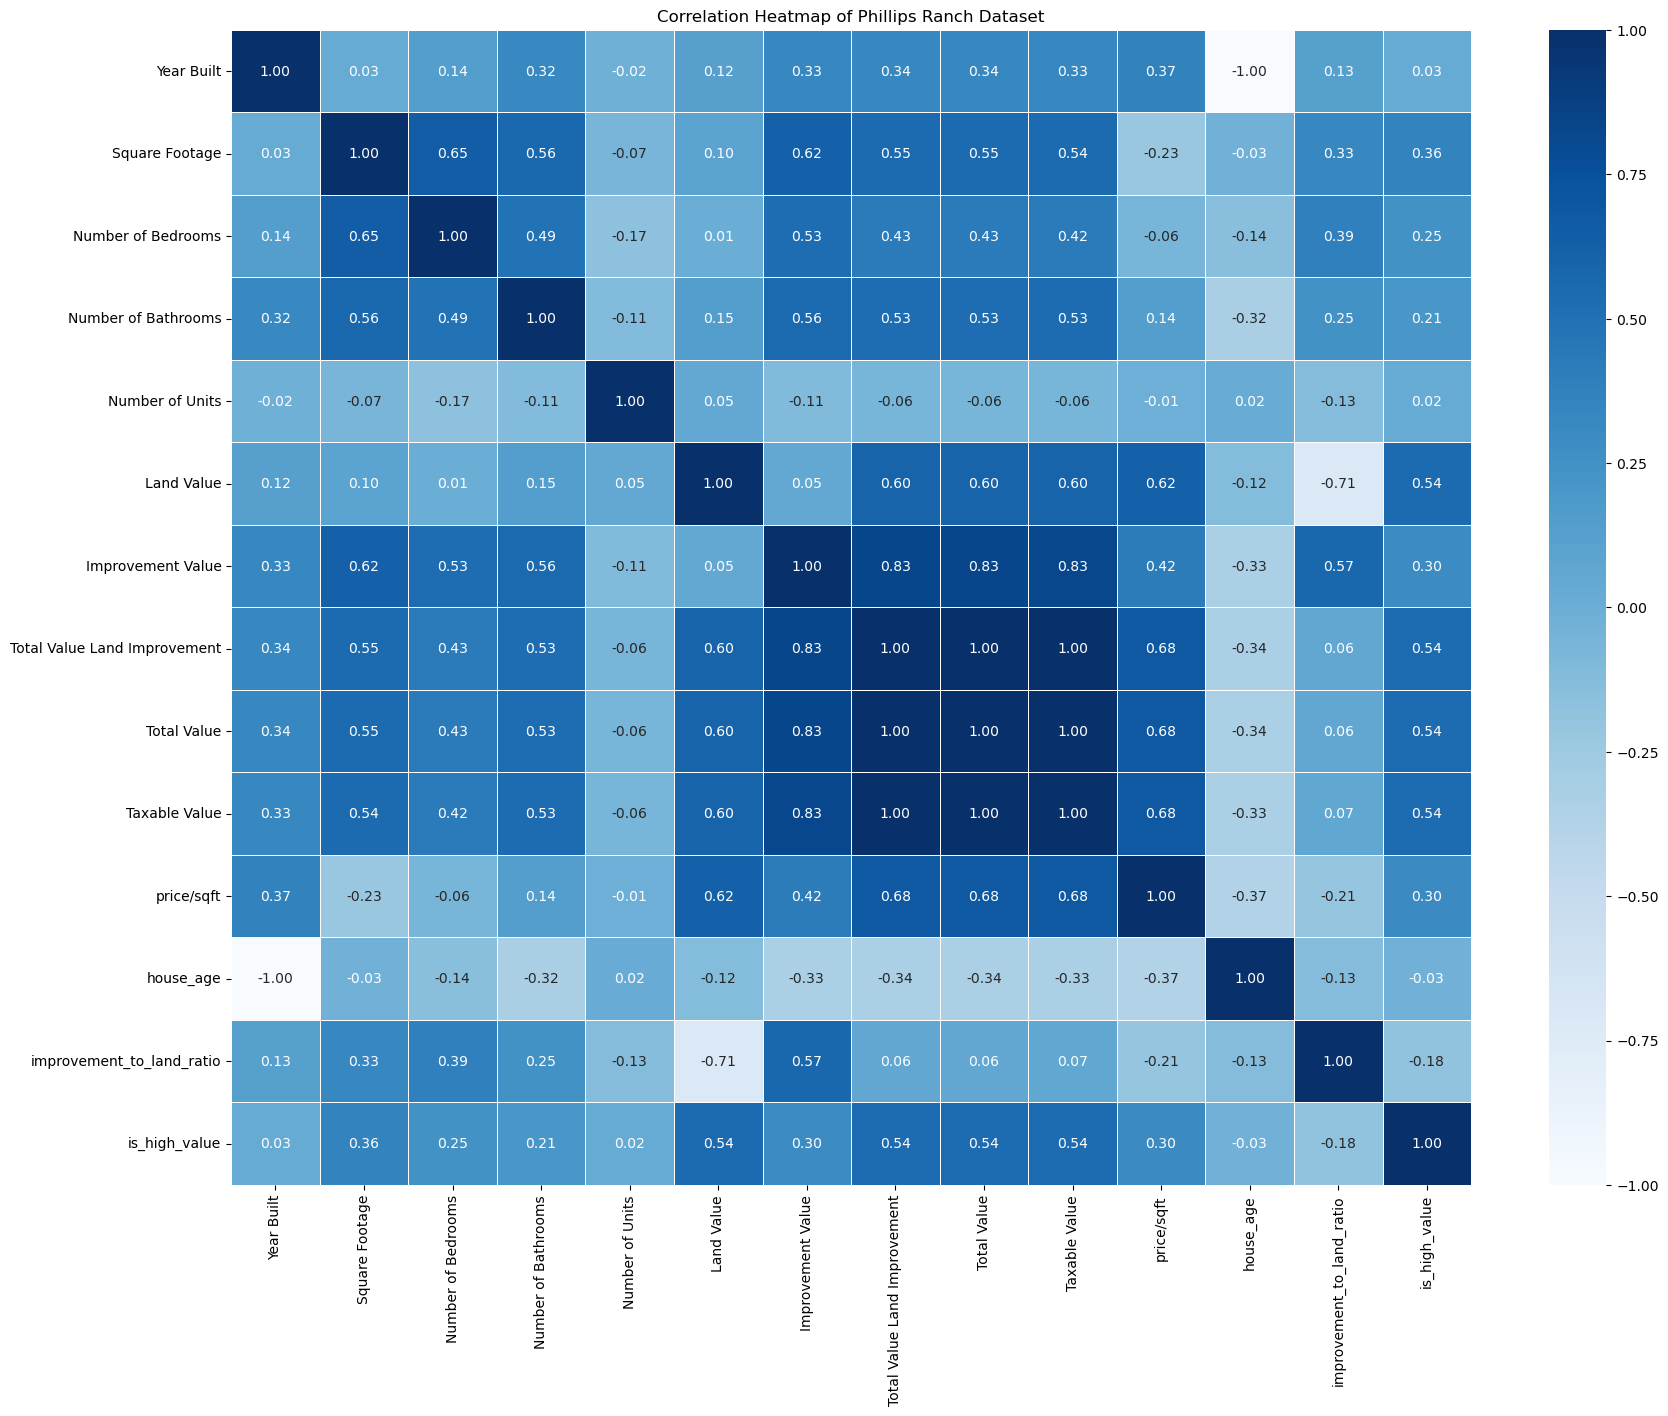

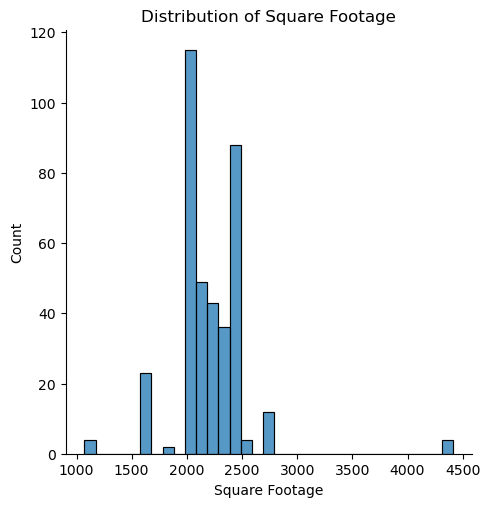

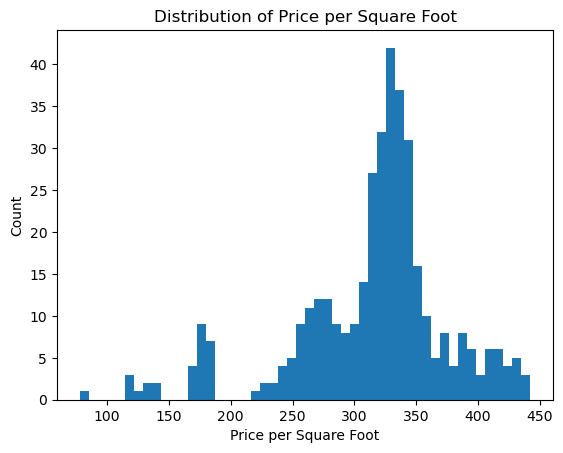

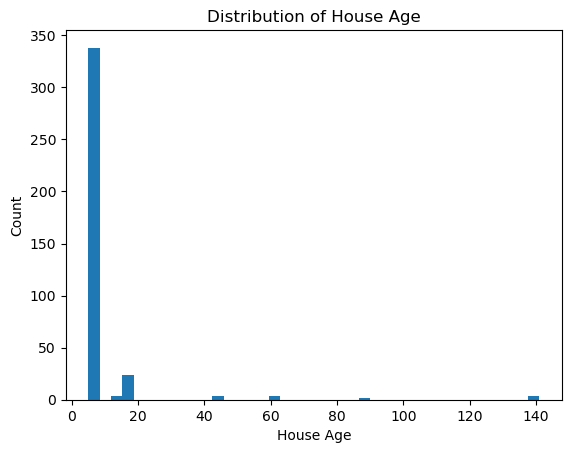

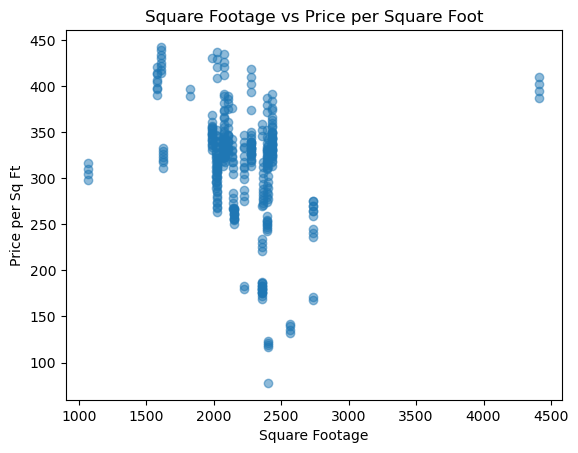

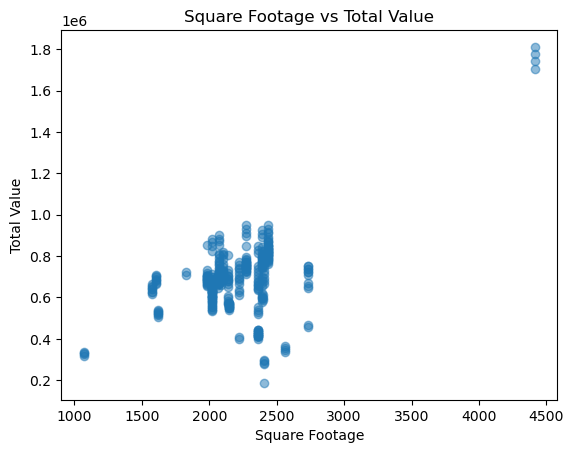

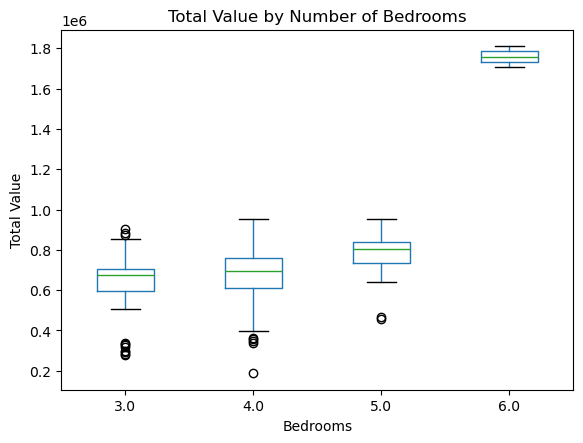

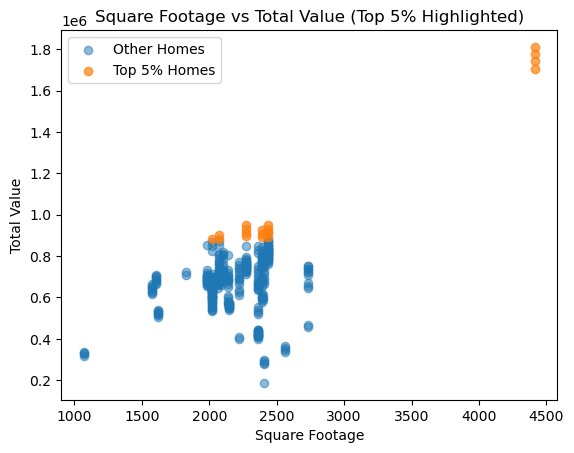

In [10]:
from src.eda_plots import (
    plot_histograms,
    plot_corr_heatmap,
    plot_distributions,
    plot_relationships,
    plot_high_value_scatter
)

plot_histograms(df)
plot_corr_heatmap(df, title="Correlation Heatmap of Phillips Ranch Dataset")
plot_distributions(df)
plot_relationships(df)
plot_high_value_scatter(df)

In [9]:
df.head()

,Property Use Type,Year Built,Square Footage,Number of Bedrooms,Number of Bathrooms,Number of Units,Land Value,Improvement Value,Total Value Land Improvement,Total Value,Taxable Value,price/sqft,house_age,improvement_to_land_ratio,is_high_value
6,SFR,1885.0,2404.0,3.0,2.0,1.0,118963.0,160602.0,279565.0,279565.0,279565.0,116.291597,141.0,1.350016,False
7,SFR,2008.0,2361.0,4.0,3.0,1.0,258260.0,262176.0,520436.0,520436.0,520436.0,220.430326,18.0,1.015163,False
8,SFR,2008.0,2361.0,4.0,3.0,1.0,119246.0,296931.0,416177.0,416177.0,416177.0,176.271495,18.0,2.490071,False
9,SFR,2008.0,2361.0,4.0,3.0,1.0,279297.0,356664.0,635961.0,635961.0,488426.0,269.360864,18.0,1.277006,False
10,SFR,2008.0,2361.0,4.0,3.0,1.0,118963.0,296228.0,415191.0,415191.0,415191.0,175.853875,18.0,2.490085,False


In [18]:
# check the ratio of improvement value and land value, to see if the value comes from the structure or the land
df["improvement_to_land_ratio"] = (
    df["Improvement Value"] / df["Land Value"]
)

df['improvement_to_land_ratio'].head()

6     1.350016
7     1.015163
8     2.490071
9     1.277006
10    2.490085
Name: improvement_to_land_ratio, dtype: float64

In [19]:
# clean any impossible values
df = df[
    (df["Square Footage"] > 0) &
    (df["Total Value"] > 0) &
    (df["house_age"] >= 0)
]

In [20]:
## Hypothesis & Questions

In [ ]:
## Analyze the Distributions

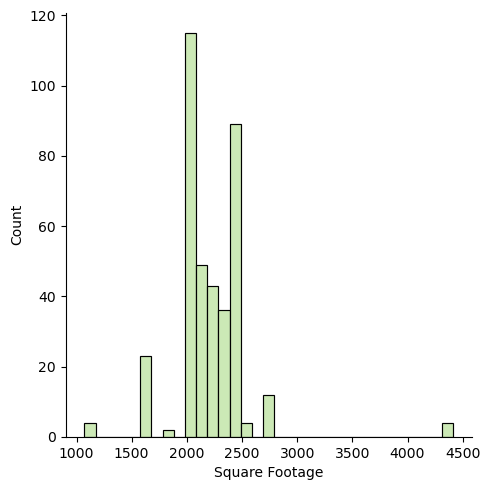

In [22]:
# Visualizing Square Footage:

sns.displot(df['Square Footage'], color='#bce29e')
plt.show()

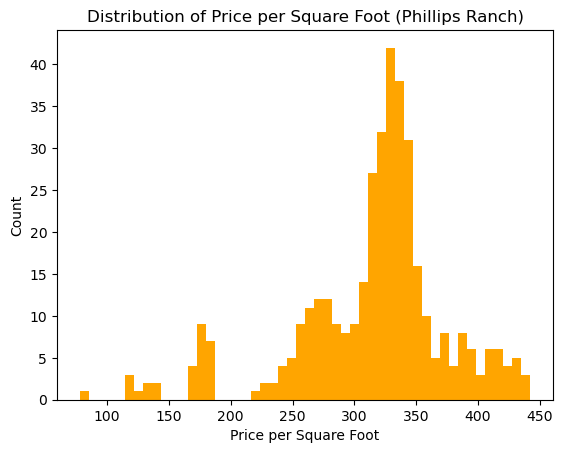

In [23]:
plt.hist(df["price/sqft"], bins=50, color='orange')
plt.xlabel("Price per Square Foot")
plt.ylabel("Count")
plt.title("Distribution of Price per Square Foot (Phillips Ranch)")
plt.show()


In [ ]:
The data shows that Price per SqFt is right-skewed, with most homes clustered in the left side of the graph, which also means that the mean is typically greater than the median.

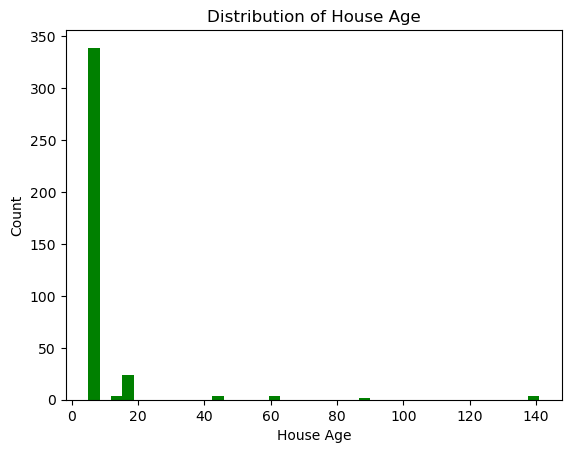

In [24]:
plt.hist(df["house_age"], bins=40, color='green')
plt.xlabel("House Age")
plt.ylabel("Count")
plt.title("Distribution of House Age")
plt.show()


In [ ]:
The graph shows that most single family residence in Phillips Ranch were built around 6-7 years ago.

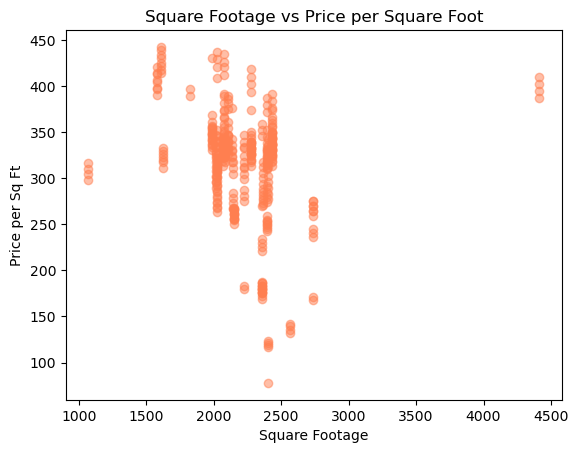

In [25]:
plt.scatter(df["Square Footage"], df["price/sqft"], alpha=0.5, color='coral')
plt.xlabel("Square Footage")
plt.ylabel("Price per Sq Ft")
plt.title("Square Footage vs Price per Square Foot")
plt.show()

In [ ]:
The relationship between square footage and price per sqft is negatively correlated as larger properties tend to have lower price per sqft.
There are outliers that have higher price per sqft with larger area than the main cluster.

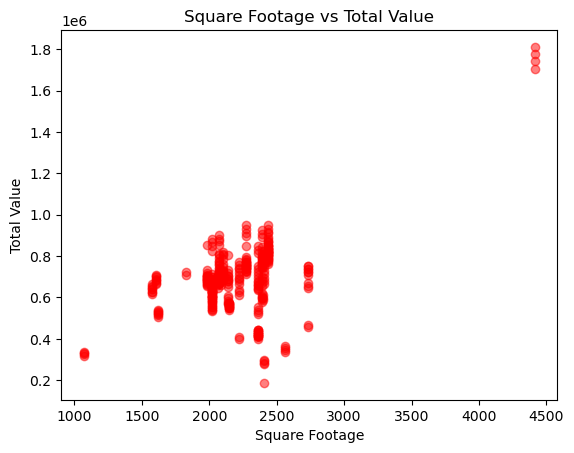

In [26]:
plt.scatter(df["Square Footage"], df["Total Value"], alpha=0.5, color='red')
plt.xlabel("Square Footage")
plt.ylabel("Total Value")
plt.title("Square Footage vs Total Value")
plt.show()

In [ ]:
The properties fall into two main clusters:
    - A large group with square footage between approximately 2,000 and 2,500 sqft, values between $500,000 and $900,000.
    - A smaller, distinct group falls in around 4500 sqft with value over $1.6 million.

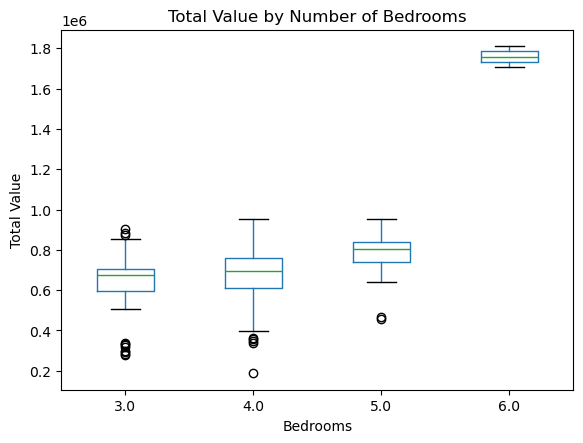

In [28]:
df.boxplot(column="Total Value", by="Number of Bedrooms", grid=False)
plt.xlabel("Bedrooms")
plt.ylabel("Total Value")
plt.title("Total Value by Number of Bedrooms")
plt.suptitle("")
plt.show()

In [29]:
threshold = df["Total Value"].quantile(0.95)
df['is_high_value'] = df["Total Value"] >= threshold
print(df['is_high_value'].value_counts())
df.groupby("is_high_value")[["Square Footage", "price/sqft"]].mean()

is_high_value
False    361
True      20
Name: count, dtype: int64


,Square Footage,price/sqft
is_high_value,,
False,2176.819945,311.349473
True,2735.900000,395.402470


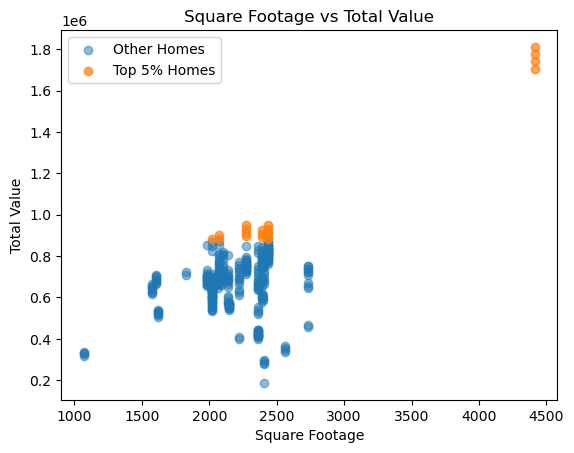

In [30]:
high = df[df["is_high_value"]]
normal = df[~df["is_high_value"]]

plt.scatter(
    normal["Square Footage"],
    normal["Total Value"],
    alpha=0.5,
    label="Other Homes"
)

plt.scatter(
    high["Square Footage"],
    high["Total Value"],
    alpha=0.7,
    label="Top 5% Homes"
)

plt.xlabel("Square Footage")
plt.ylabel("Total Value")
plt.title("Square Footage vs Total Value")
plt.legend()
plt.show()


In [ ]:
High-value homes at the top 5% are on average about 500 square feet larger than the rest of 95% and also have significantly higher price per square foot. It debunks the idea that larger houses have a lower price per square foot.

In [ ]:
## Modeling

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score
import xgboost as xgb
import pandas as pd

In [31]:
#Dropping the column to find what features influence the house the most
features = [
    'Year Built', 'Square Footage',
       'Number of Bedrooms', 'Number of Bathrooms', 'Number of Units']


X = df[features]
y = df['Total Value']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=42)

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor (
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

xgb = XGBRegressor (
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [34]:
models = {
    "Linear Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb
}

results = []

for name, model in models.items():
    preds = model.predict(X_test)
    results.append({
        "Model": name,
        "R2": r2_score(y_test, preds),
        "MAE": mean_absolute_percentage_error(y_test, preds)
    })

pd.DataFrame(results).sort_values("MAE")


,Model,R2,MAE
2,XGBoost,0.584441,0.103602
1,Random Forest,0.568490,0.109803
0,Linear Regression,0.090714,0.176852


In [ ]:
Model accuracy was evaluated using out-of-sample R² and normalized mean absolute error. Tree-based models substantially outperformed linear regression, with XGBoost achieving an average error of approximately 10% compared to 18% for linear regression. This indicates that nonlinear interactions play a significant role in determining property value. Consequently, valuation conclusions rely primarily on tree-based models, with linear regression used for interpretability.

In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)


xgb = XGBRegressor (
    n_estimators=600,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

scores = cross_validate(
    xgb, X, y,
    cv=cv,
    scoring={
    "mae": "neg_mean_absolute_error",
    "r2": "r2"
    },
    return_train_score=False
)

mae = -scores["test_mae"]
r2 = scores["test_r2"]

print("XGB CV MAE mean:", mae.mean(), "std:", mae.std())
print("XGB CV R2  mean:", r2.mean(),  "std:", r2.std())

In [ ]:
final_xgb = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

final_xgb.fit(X_train, y_train)

In [ ]:
import joblib
joblib.dump(final_xgb, "xgb_final_model.pkl")

In [ ]:
## Undervalued or Overvalued

In [ ]:
MAE = 46157.47

def valuation_label(listing_price, predicted_price, mae=46157.47, pct=0.05):
    threshold = max(mae, pct * predicted_price)
    diff = listing_price - predicted_price
    if diff > threshold:
        return "Overvalued", diff, threshold
    elif diff < -threshold:
        return "Undervalued", diff, threshold
    else:
        return "Fairly priced", diff, threshold

In [ ]:
sample = X.sample(15, random_state=42)
preds = final_xgb.predict(sample)

check = pd.DataFrame({
    "Actual": y.loc[sample.index].values,
    "Predicted": preds,
    "AbsError": np.abs(y.loc[sample.index].values - preds),
    "PctError": np.abs(y.loc[sample.index].values - preds) / y.loc[sample.index].values
})

print(check)
print("Mean Abs Error:", check["AbsError"].mean())
print("Mean Pct Error:", check["PctError"].mean())


In [ ]:
idx = sample.index[11]
print(X.loc[idx])
print("Actual price:", y.loc[idx])

In [ ]:
import shap

explainer = shap.TreeExplainer(final_xgb)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

In [ ]:
House prices in Phillips Ranch are primarily driven by construction year and square footage, with bedrooms and bathrooms contributing secondary effects. Properties with strong feature-based value but low observed prices may indicate undervaluation due to unobserved conditions.